In [2]:
import pandas as pd

pib_02_09 = pd.read_excel("PIB dos Municípios - base de dados 2002-2009.xls")

pib_10_21 = pd.read_excel("PIB dos Municípios - base de dados 2010-2021.xlsx")

In [3]:
pib_02_09

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Semiárido,Cidade-Região de São Paulo,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,Não,Não,27013.223,9376.871,2.465111e+04,4.270052e+04,1.037417e+05,7.549266e+03,1.112910e+05,4047.83
1,2002,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,Não,Não,28590.178,99922.936,1.618515e+05,1.165622e+05,4.069268e+05,4.266597e+04,4.495928e+05,5667.37
2,2002,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,Não,Não,10883.801,1961.907,5.128876e+03,1.192500e+04,2.989958e+04,1.867935e+03,3.176752e+04,4246.99
3,2002,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,Não,Não,32810.376,98292.764,1.757487e+05,1.179683e+05,4.248201e+05,4.962295e+04,4.744431e+05,6353.27
4,2002,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,Não,Não,11283.793,6651.475,2.530601e+04,2.773137e+04,7.097264e+04,8.200971e+03,7.917361e+04,4442.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44496,2009,5,Centro-oeste,52,GO,Goiás,5222005,Vianópolis,NaN,5205,...,Não,Não,53529.085,14813.168,5.861758e+04,2.621616e+04,1.531760e+05,1.116034e+04,1.643363e+05,12807.76
44497,2009,5,Centro-oeste,52,GO,Goiás,5222054,Vicentinópolis,NaN,5205,...,Não,Não,63465.040,11101.418,3.807091e+04,1.397402e+04,1.266114e+05,6.819030e+03,1.334304e+05,21898.97
44498,2009,5,Centro-oeste,52,GO,Goiás,5222203,Vila Boa,Região Integrada de Desenvolvimento do Distrit...,5204,...,Não,Não,25391.520,12652.835,1.992101e+04,1.146330e+04,6.942867e+04,3.938713e+03,7.336738e+04,16026.08
44499,2009,5,Centro-oeste,52,GO,Goiás,5222302,Vila Propício,Região Integrada de Desenvolvimento do Distrit...,5204,...,Não,Não,49814.218,26168.428,1.679321e+04,1.184774e+04,1.046236e+05,2.501794e+03,1.071254e+05,19989.81


In [4]:
pib_2009 = pib_02_09[pib_02_09['Ano'] == 2009][['Ano','Sigla da Unidade da Federação', 'Código do Município', 'Nome do Município', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']]
pib_2021 = pib_10_21[pib_10_21['Ano'] == 2021][['Ano','Sigla da Unidade da Federação' ,'Código do Município', 'Nome do Município', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']]


merged = pd.merge(pib_2009, pib_2021, on='Código do Município', suffixes=('_2009', '_2021'))


merged['Growth'] = merged['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2021'] / merged['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2009']

In [5]:
merged.sort_values(by='Growth', ascending=False).head(20)

,Ano_2009,Sigla da Unidade da Federação_2009,Código do Município,Nome do Município_2009,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2009","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2009",Ano_2021,Sigla da Unidade da Federação_2021,Nome do Município_2021,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2021","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2021",Growth
3214,2009,RJ,3302700,Maricá,980048.104,7936.13,2021,RJ,Maricá,8.581430e+07,511810.82,87.561310
2434,2009,MG,3117504,Conceição do Mato Dentro,103775.029,5599.17,2021,MG,Conceição do Mato Dentro,9.051036e+06,519040.92,87.217856
2409,2009,MG,3115359,Catas Altas,65755.773,13713.40,2021,MG,Catas Altas,5.032358e+06,920833.97,76.531039
523,2009,MA,2104305,Godofredo Viana,39515.343,3525.95,2021,MA,Godofredo Viana,2.658714e+06,219655.83,67.283086
292,2009,PA,1508357,Vitória do Xingu,69652.437,7207.41,2021,PA,Vitória do Xingu,4.230778e+06,274351.70,60.741270
183,2009,PA,1502152,Canaã dos Carajás,710918.102,25688.10,2021,PA,Canaã dos Carajás,3.498961e+07,894806.28,49.217498
618,2009,MA,2110302,Santo Antônio dos Lopes,63724.709,4345.95,2021,MA,Santo Antônio dos Lopes,3.055591e+06,210498.16,47.949867
192,2009,PA,1502772,Curionópolis,89051.685,4962.76,2021,PA,Curionópolis,3.667341e+06,206447.92,41.182160
3498,2009,SP,3520400,Ilhabela,340010.476,13071.80,2021,SP,Ilhabela,1.395662e+07,385605.85,41.047612
2623,2009,MG,3133709,Itatiaiuçu,179772.120,19198.22,2021,MG,Itatiaiuçu,6.934792e+06,610779.65,38.575460


In [6]:
merged['Growth per Capita'] = merged['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2021'] / merged['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2009']

merged.sort_values(by='Growth per Capita', ascending=False)

,Ano_2009,Sigla da Unidade da Federação_2009,Código do Município,Nome do Município_2009,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2009","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2009",Ano_2021,Sigla da Unidade da Federação_2021,Nome do Município_2021,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2021","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2021",Growth,Growth per Capita
2434,2009,MG,3117504,Conceição do Mato Dentro,103775.029,5599.17,2021,MG,Conceição do Mato Dentro,9.051036e+06,519040.92,87.217856,92.699618
2409,2009,MG,3115359,Catas Altas,65755.773,13713.40,2021,MG,Catas Altas,5.032358e+06,920833.97,76.531039,67.148480
3214,2009,RJ,3302700,Maricá,980048.104,7936.13,2021,RJ,Maricá,8.581430e+07,511810.82,87.561310,64.491234
523,2009,MA,2104305,Godofredo Viana,39515.343,3525.95,2021,MA,Godofredo Viana,2.658714e+06,219655.83,67.283086,62.296921
618,2009,MA,2110302,Santo Antônio dos Lopes,63724.709,4345.95,2021,MA,Santo Antônio dos Lopes,3.055591e+06,210498.16,47.949867,48.435477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2009,SC,4200507,Águas de Chapecó,206240.706,32458.41,2021,SC,Águas de Chapecó,1.376880e+05,21040.34,0.667608,0.648225
3751,2009,SP,3543253,Ribeirão Grande,179590.704,25685.17,2021,SP,Ribeirão Grande,1.169917e+05,15221.41,0.651435,0.592615
1810,2009,SE,2806107,Rosário do Catete,674268.513,75211.21,2021,SE,Rosário do Catete,4.689561e+05,42028.68,0.695503,0.558809
2535,2009,MG,3126307,Fortaleza de Minas,211257.416,52999.85,2021,MG,Fortaleza de Minas,1.113065e+05,24956.60,0.526876,0.470881


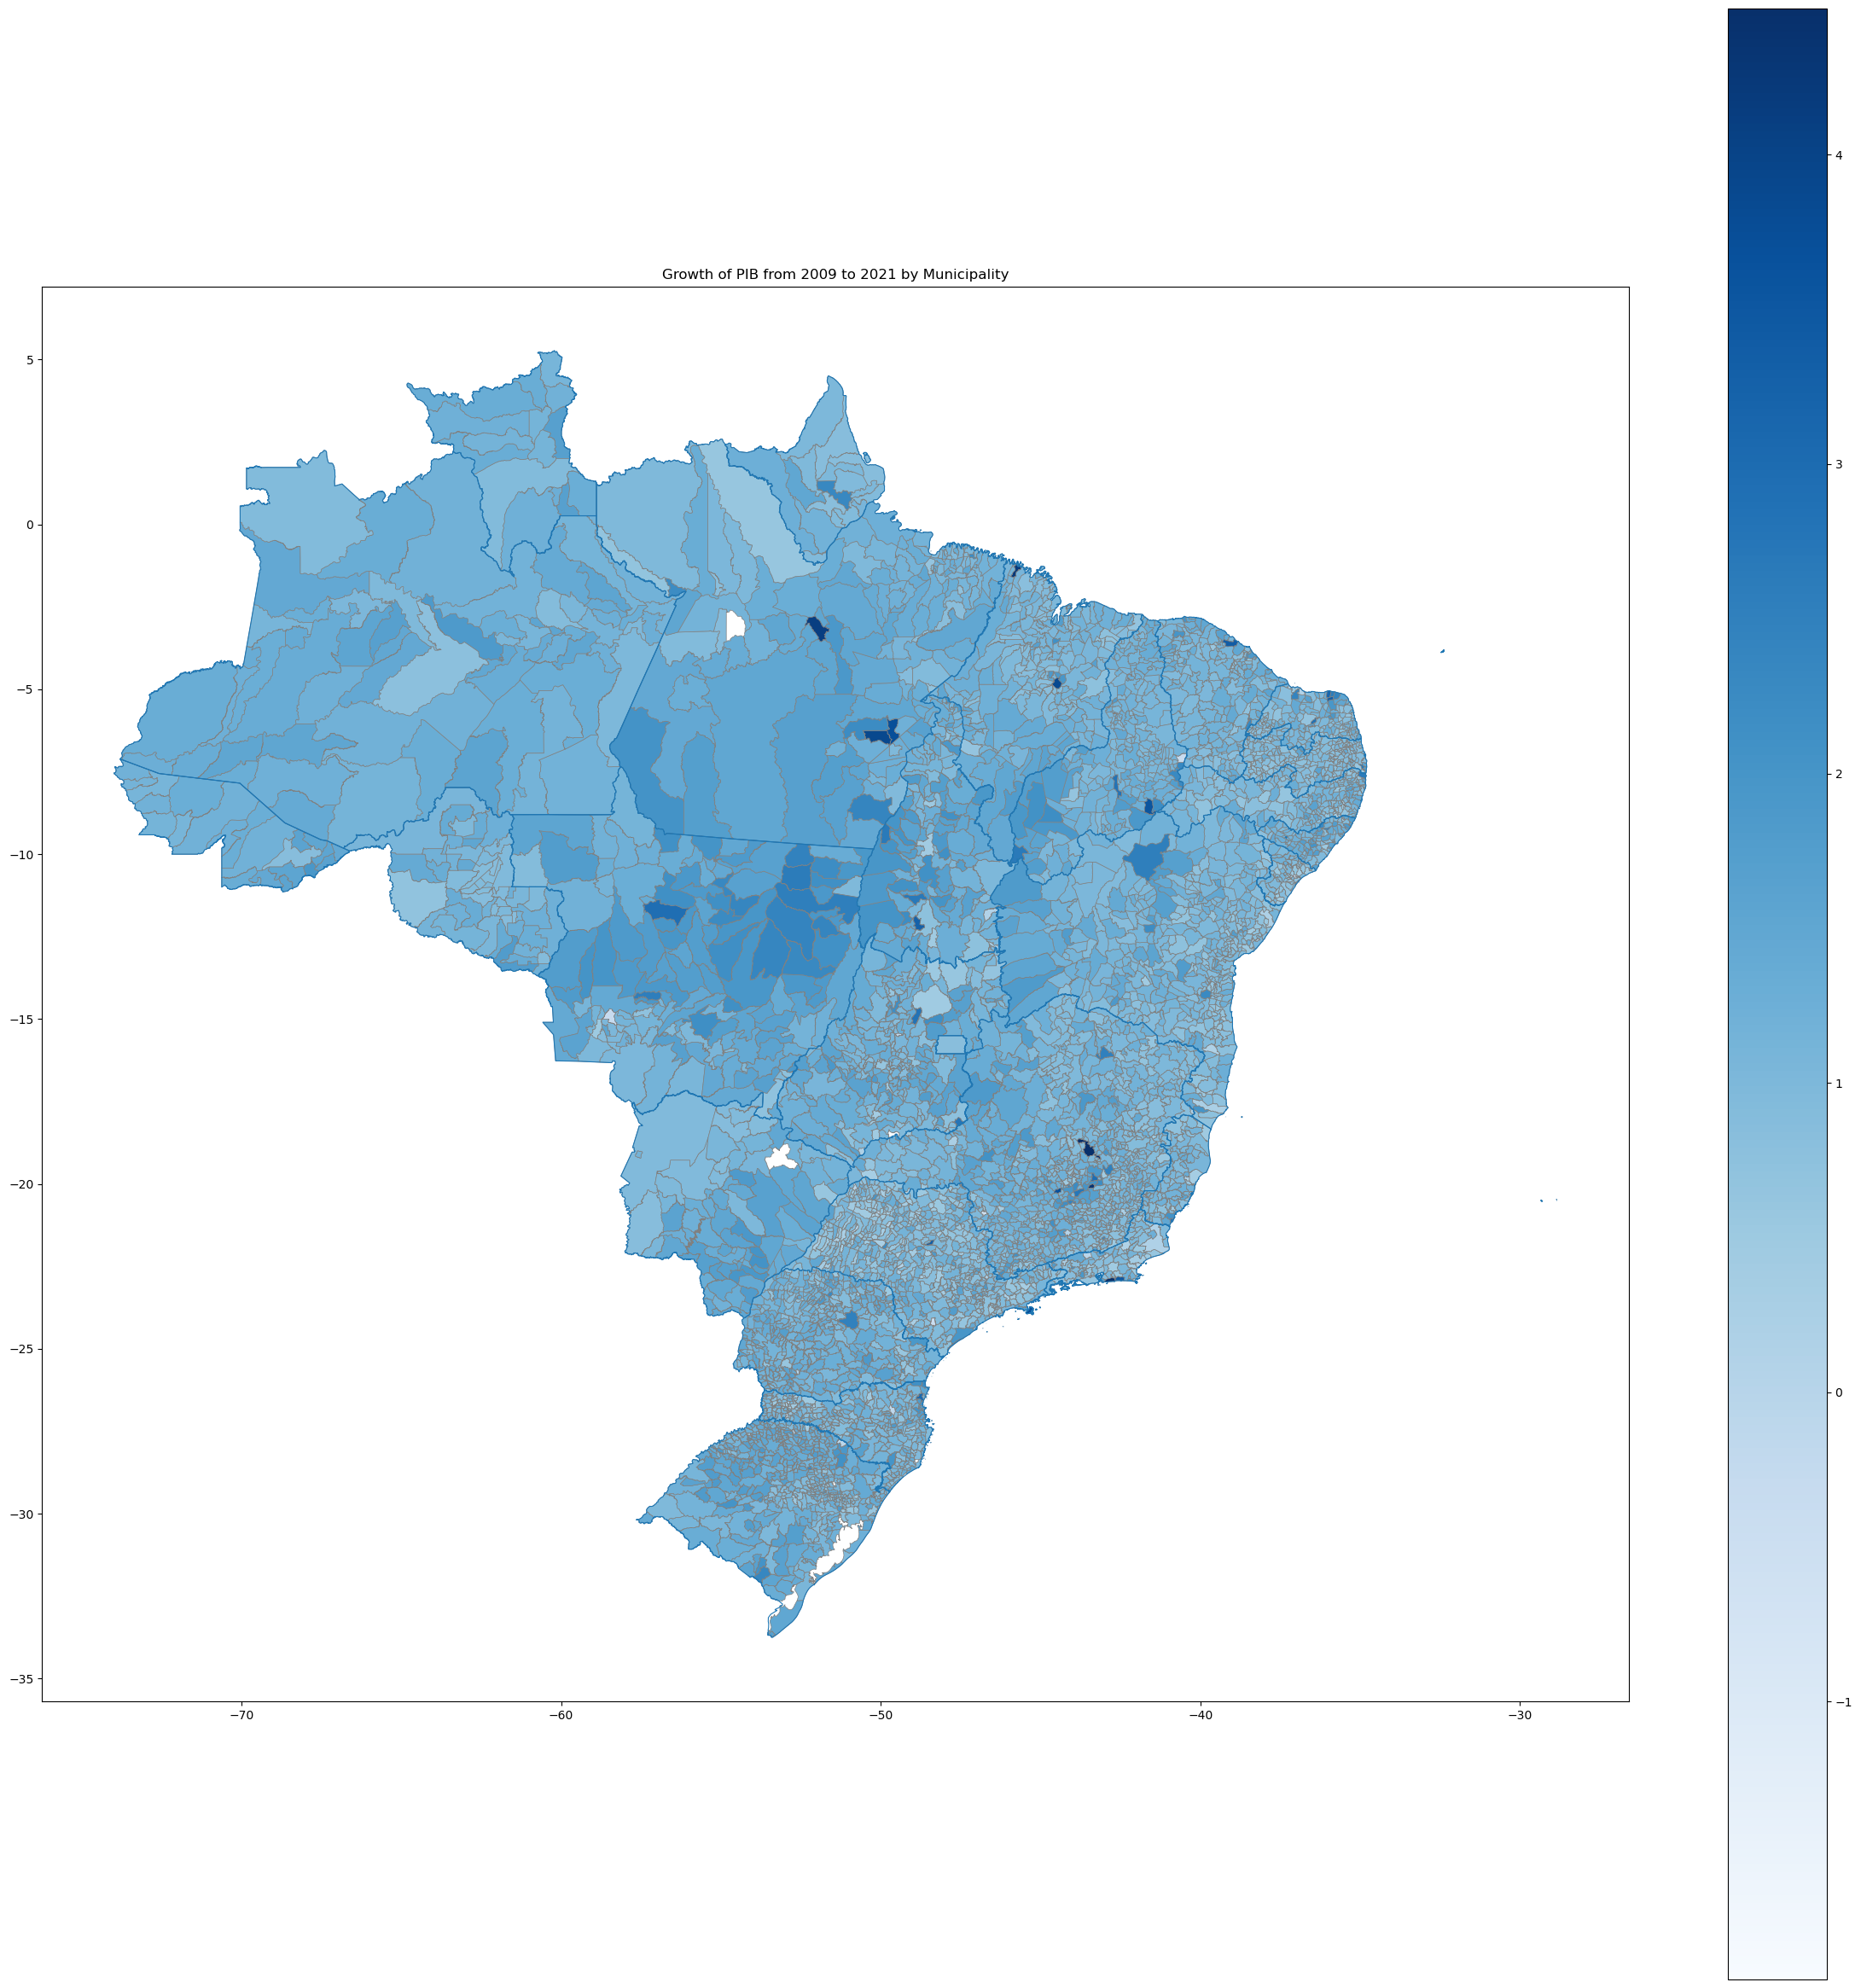

In [7]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "BR_Municipios_2022/BR_Municipios_2022.shp"
gdf = gpd.read_file(shapefile_path)

shape_uf = "BR_UF_2022/BR_UF_2022.shp"
gdf_uf = gpd.read_file(shape_uf)


# Ensure the columns to merge on have the same data type
gdf['CD_MUN'] = gdf['CD_MUN'].astype(str)
merged['Código do Município'] = merged['Código do Município'].astype(str)

# Merge the shapefile with the merged dataframe
gdf = gdf.merge(merged, left_on="CD_MUN", right_on="Código do Município")
gdf['Growth_log'] = gdf['Growth'].apply(lambda x: 0 if x == 0 else np.log(x))
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
gdf.plot(column='Growth_log', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
gdf_uf.boundary.plot(ax=ax, linewidth=0.8)
plt.title('Growth of PIB from 2009 to 2021 by Municipality')
plt.show()

In [8]:
matopiba = pd.read_excel("MATOPIBA_2021.xls")
matopiba

,CD_MUN,NM_MUN,cod_Mun_MATOPIBA
0,2933455,Wanderley,2933455
1,2930907,Tabocas do Brejo Velho,2930907
2,2930758,Sítio do Mato,2930758
3,2930303,Serra Dourada,2930303
4,2930154,Serra do Ramalho,2930154
...,...,...,...
332,1700707,Alvorada,1700707
333,1700400,Almas,1700400
334,1700350,Aliança do Tocantins,1700350
335,1700301,Aguiarnópolis,1700301


In [9]:
pib_matopiba = gdf[gdf['Sigla da Unidade da Federação_2009'].isin(['MA', 'TO', 'PI', 'BA'])]
pib_matopiba['is_matopiba'] = pib_matopiba['Código do Município'].apply(lambda x: 1 if x in matopiba['CD_MUN'].astype(str).values else 0)
pib_matopiba

c:\Programming\envs\Questions\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Ano_2009,Sigla da Unidade da Federação_2009,Código do Município,Nome do Município_2009,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2009","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2009",Ano_2021,Sigla da Unidade da Federação_2021,Nome do Município_2021,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)_2021","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)_2021",Growth,Growth per Capita,Growth_log,is_matopiba
310,1700251,Abreulândia,TO,1906.295,"POLYGON ((-49.17084 -9.74152, -49.17094 -9.741...",2009,TO,1700251,Abreulândia,14972.975,6451.09,2021,TO,Abreulândia,112134.759,42979.98,7.489144,6.662437,2.013454,1
311,1700301,Aguiarnópolis,TO,236.792,"POLYGON ((-47.45877 -6.54768, -47.45887 -6.552...",2009,TO,1700301,Aguiarnópolis,58658.729,13913.36,2021,TO,Aguiarnópolis,165479.833,23475.65,2.821061,1.687274,1.037113,1
312,1700350,Aliança do Tocantins,TO,1580.999,"POLYGON ((-48.74704 -11.35492, -48.75223 -11.3...",2009,TO,1700350,Aliança do Tocantins,41792.763,7178.42,2021,TO,Aliança do Tocantins,616571.342,116268.40,14.753065,16.196935,2.691451,1
313,1700400,Almas,TO,4007.152,"POLYGON ((-47.14777 -11.07431, -47.14766 -11.0...",2009,TO,1700400,Almas,52338.041,6882.06,2021,TO,Almas,273740.577,39643.82,5.230241,5.760458,1.654457,1
314,1700707,Alvorada,TO,1207.201,"POLYGON ((-49.15823 -12.23720, -49.15816 -12.2...",2009,TO,1700707,Alvorada,121002.259,14826.89,2021,TO,Alvorada,474111.349,56569.78,3.918202,3.815350,1.365633,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,2933307,Vitória da Conquista,BA,3254.186,"POLYGON ((-40.71779 -14.88926, -40.71774 -14.8...",2009,BA,2933307,Vitória da Conquista,3095119.857,9705.58,2021,BA,Vitória da Conquista,8215792.966,23907.93,2.654435,2.463318,0.976232,0
2239,2933406,Wagner,BA,522.370,"POLYGON ((-41.06276 -12.28494, -41.07128 -12.2...",2009,BA,2933406,Wagner,31894.054,3621.44,2021,BA,Wagner,89605.987,9591.73,2.809489,2.648596,1.033003,0
2240,2933455,Wanderley,BA,2920.579,"POLYGON ((-43.82392 -12.12517, -43.82324 -12.1...",2009,BA,2933455,Wanderley,61088.070,4609.72,2021,BA,Wanderley,167757.286,13835.65,2.746155,3.001408,1.010202,1
2241,2933505,Wenceslau Guimarães,BA,655.057,"POLYGON ((-39.49336 -13.60308, -39.49335 -13.6...",2009,BA,2933505,Wenceslau Guimarães,139084.394,5607.79,2021,BA,Wenceslau Guimarães,331642.160,15896.95,2.384467,2.834798,0.868976,0


c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


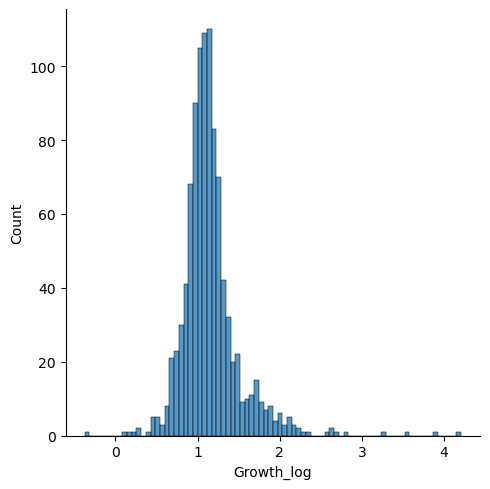

In [10]:
import seaborn as sns


sns.displot(pib_matopiba['Growth_log'])


<Axes: xlabel='is_matopiba', ylabel='Growth_log'>

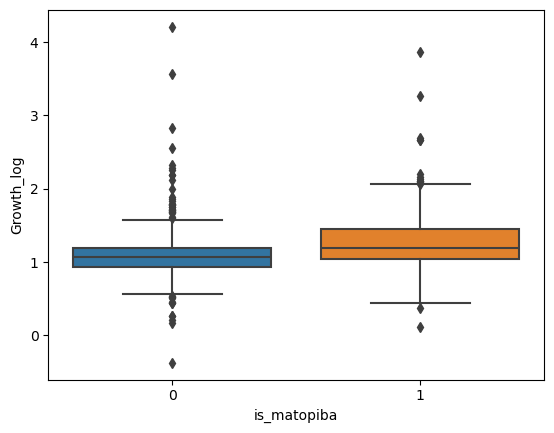

In [11]:
sns.boxplot(data=pib_matopiba, x='is_matopiba', y='Growth_log')

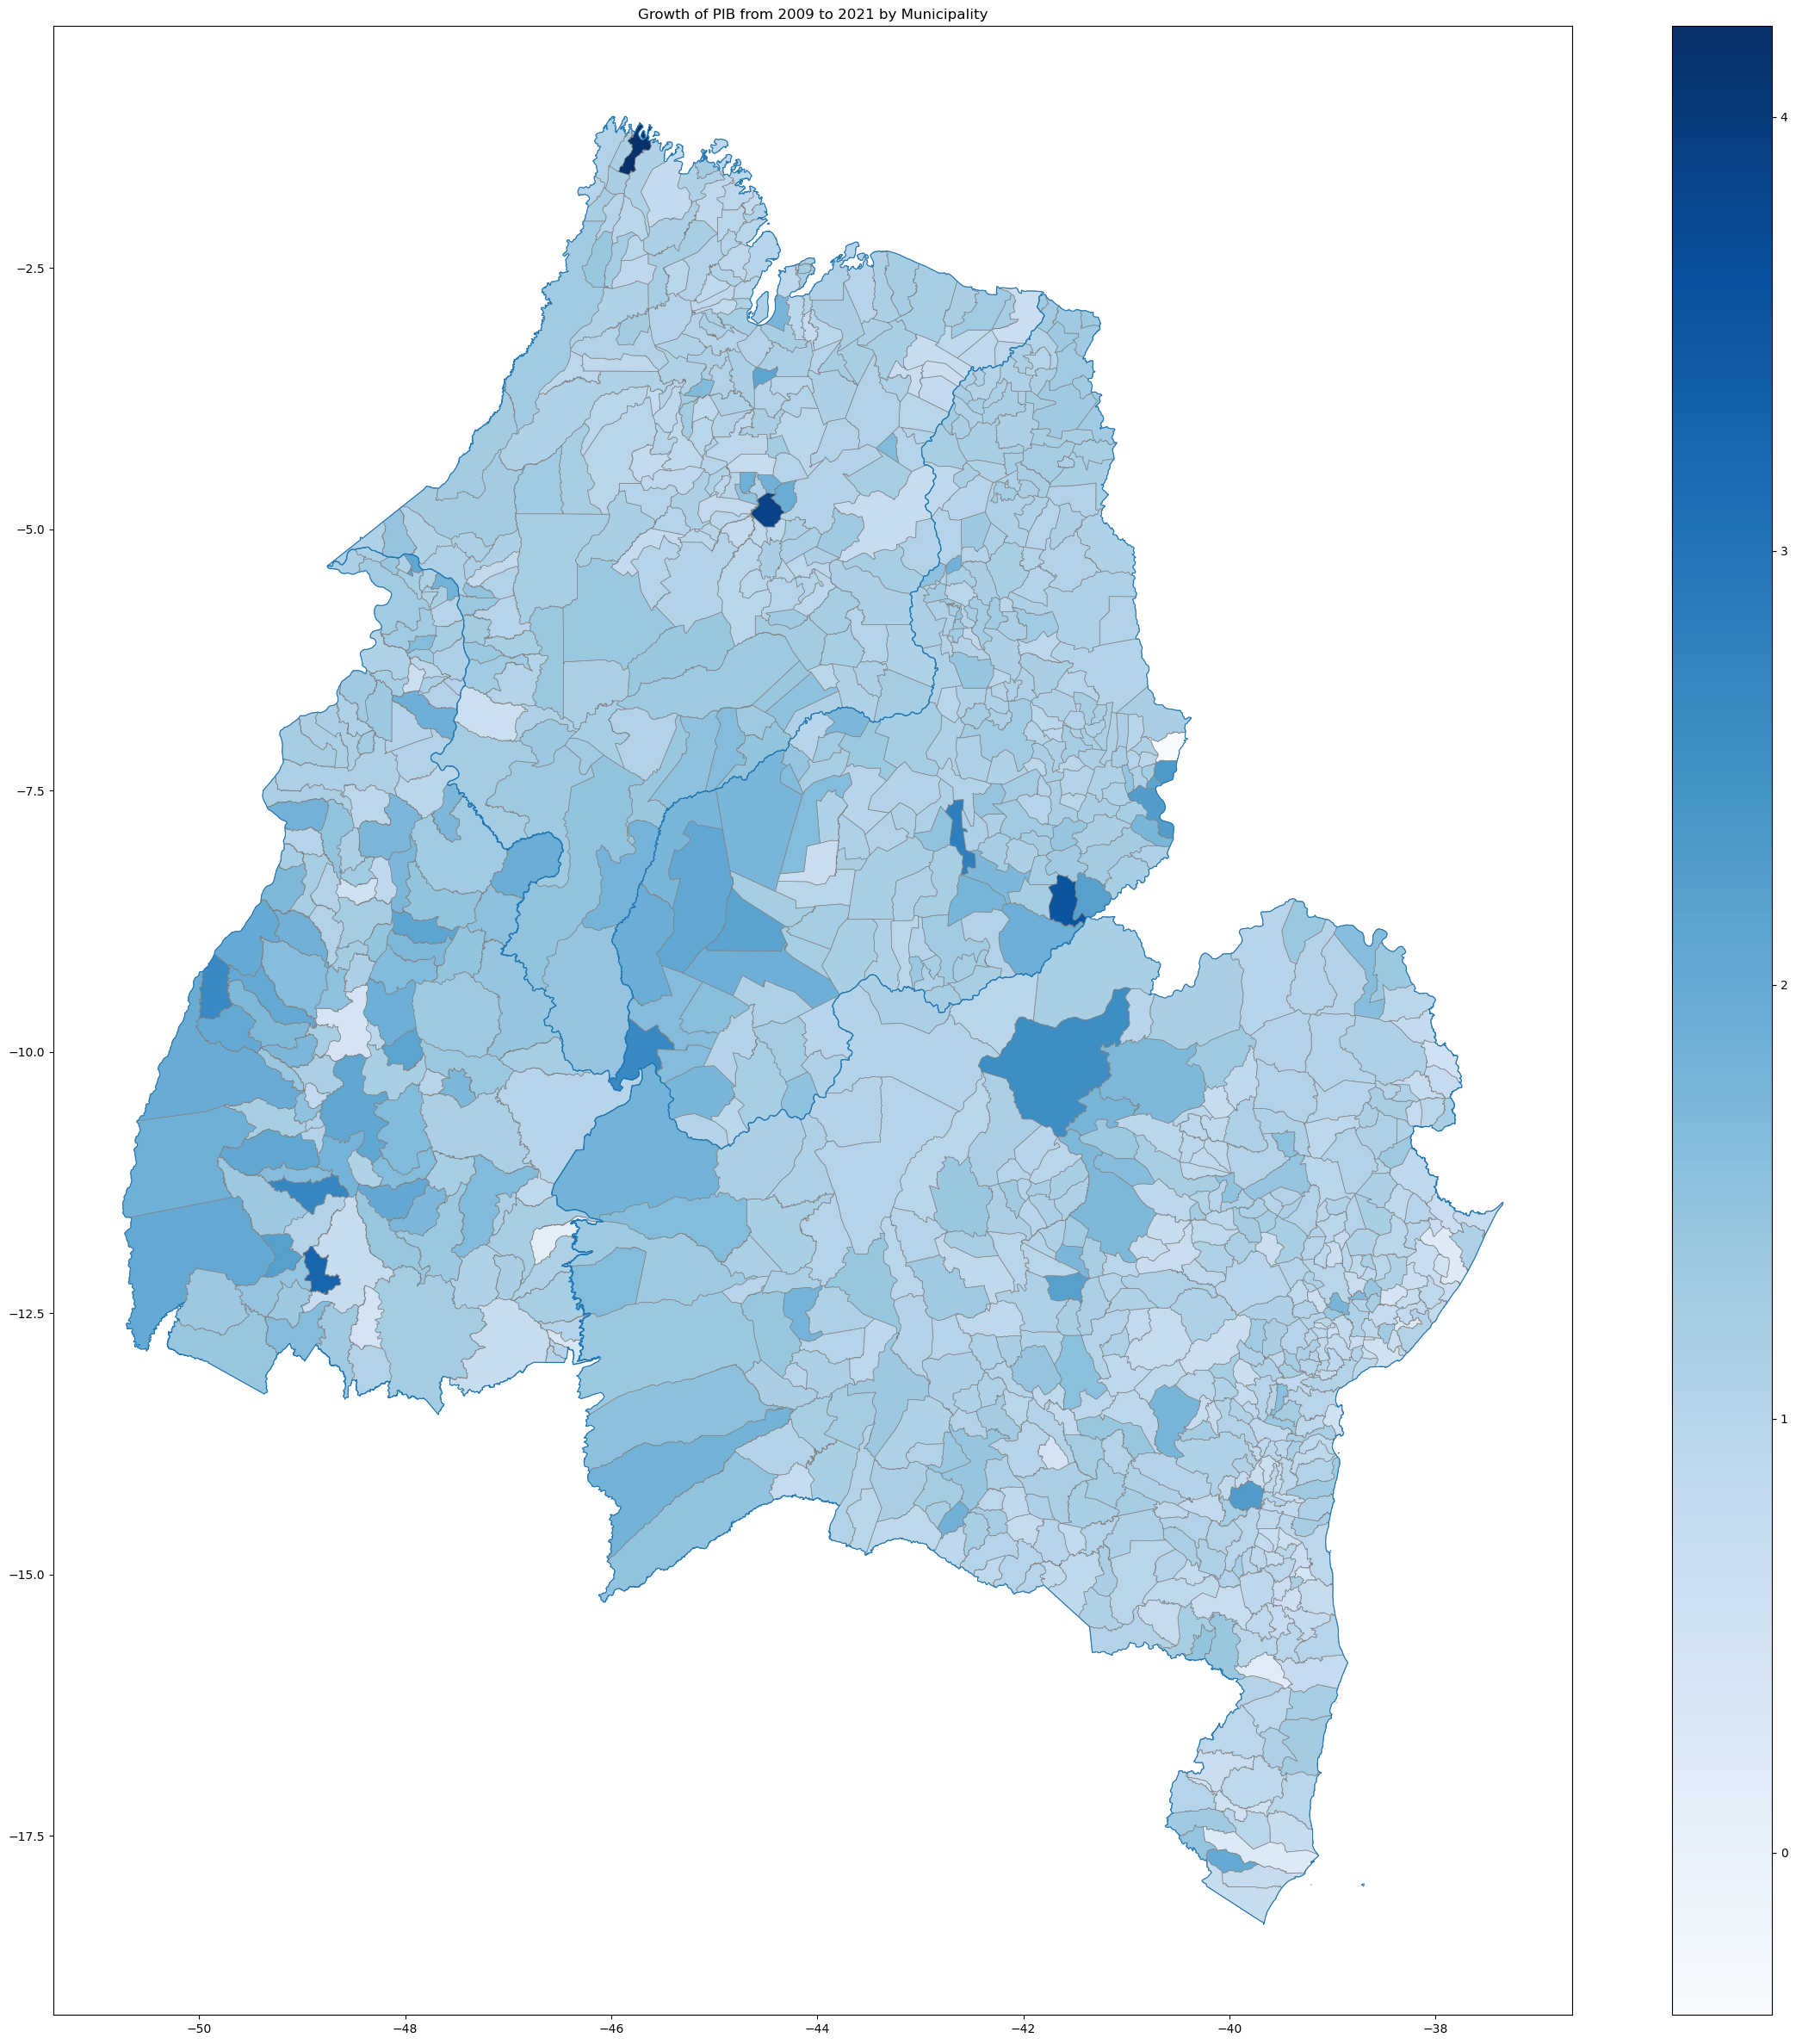

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
pib_matopiba.plot(column='Growth_log', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
gdf_uf[gdf_uf['SIGLA_UF'].isin(['MA', 'TO', 'PI', 'BA'])].boundary.plot(ax=ax, linewidth=0.8)
plt.title('Growth of PIB from 2009 to 2021 by Municipality')
plt.show()

In [13]:
pib_ba = pib_matopiba[pib_matopiba['Sigla da Unidade da Federação_2009'] == 'BA']

pib_02_09_ba = pib_02_09[pib_02_09['Sigla da Unidade da Federação'] == 'BA']
pib_10_21_ba = pib_10_21[pib_10_21['Sigla da Unidade da Federação'] == 'BA']

pib_ba_combined = pd.concat([pib_02_09_ba, pib_10_21_ba], ignore_index=True)
pib_ba_combined['is_matopiba'] = pib_ba_combined['Código do Município'].apply(lambda x: 1 if x in matopiba['CD_MUN'].values else 0)

In [14]:
pib_ba_combined['is_matopiba'].value_counts()

is_matopiba
0    7740
1     600
Name: count, dtype: int64

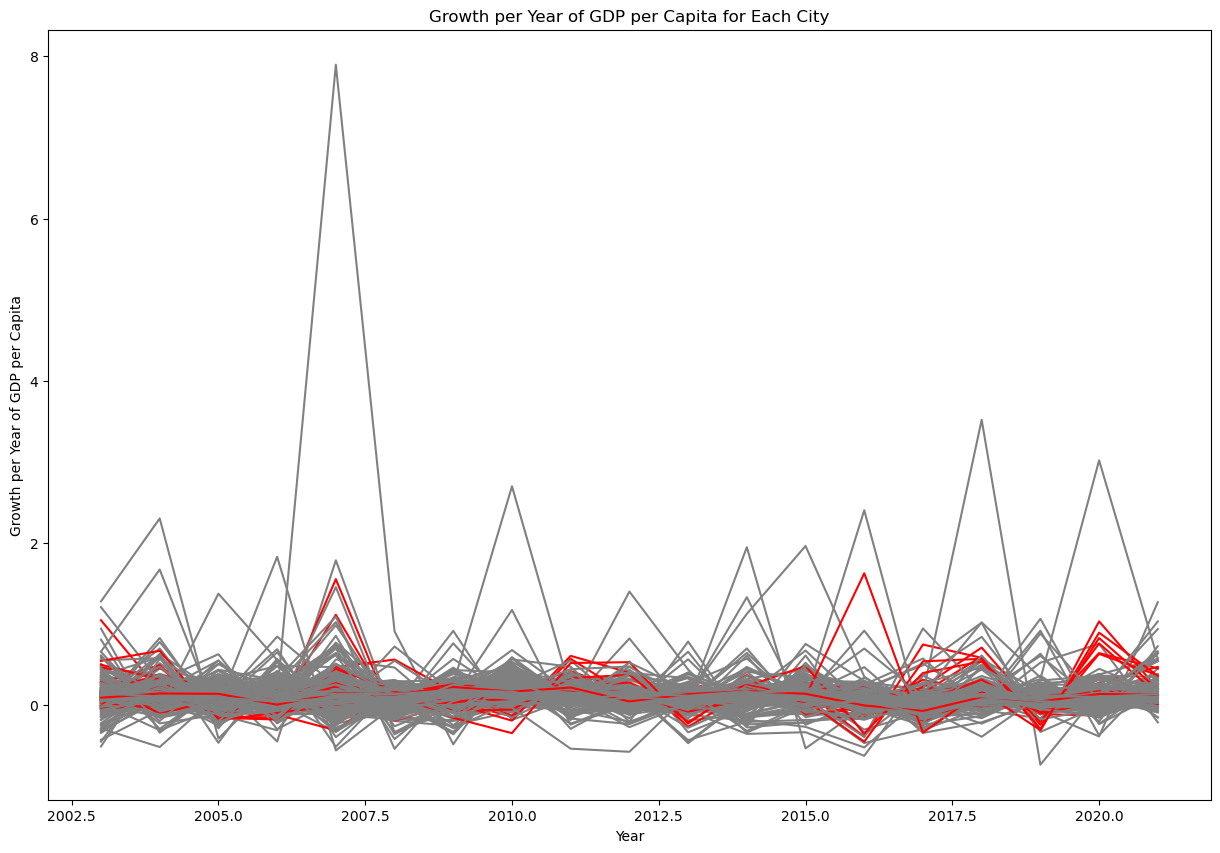

In [15]:
# Calculate the growth per year of GDP per capita
pib_ba_combined['Year'] = pib_ba_combined['Ano']
pib_ba_combined['GDP per Capita'] = pib_ba_combined['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']
pib_ba_combined['Growth per Year'] = pib_ba_combined.groupby('Código do Município')['GDP per Capita'].pct_change()

# Plot the growth per year of GDP per capita for each city
plt.figure(figsize=(15, 10))
colors = lambda i: 'red' if pib_ba_combined.iloc[i]['is_matopiba'] == 1 else 'grey'
for i, city in enumerate(pib_ba_combined['Nome do Município'].unique()):
    city_data = pib_ba_combined[pib_ba_combined['Nome do Município'] == city]
    plt.plot(city_data['Year'], city_data['Growth per Year'], label=city, color=colors(i))

plt.xlabel('Year')
plt.ylabel('Growth per Year of GDP per Capita')
plt.title('Growth per Year of GDP per Capita for Each City')

plt.show()

In [16]:
# Calculate the average growth rate per year
average_growth_rate = pib_ba_combined['Growth per Year'].mean()

# Calculate the standard deviation of the growth rate per year
std_dev_growth_rate = pib_ba_combined['Growth per Year'].std()

# Determine how many municipalities have a growth rate more than 1 standard deviation from the average
num_municipalities_above_1_std = pib_ba_combined[pib_ba_combined['Growth per Year'] > (average_growth_rate + std_dev_growth_rate)].shape[0]

print(f"Average Growth Rate per Year: {average_growth_rate}")
print(f"Standard Deviation of Growth Rate per Year: {std_dev_growth_rate}")
print(f"Number of municipalities with growth rate more than 1 standard deviation above the average: {num_municipalities_above_1_std}")

Average Growth Rate per Year: 0.10753487155638382
Standard Deviation of Growth Rate per Year: 0.18772147283708462
Number of municipalities with growth rate more than 1 standard deviation above the average: 478


In [17]:
regress_panel = pd.read_csv("regressPanel_dados.csv")

In [18]:
regress_panel

,percentage_votos_centrao,ibge,municipio,pib_per_capita,uf,taxa_analfabetismo,Year
0,0.058461,1100023,ARIQUEMES,5667.37,RO,11.100000,2002
1,0.037951,1100031,CABIXI,4246.99,RO,16.800000,2002
2,0.511934,1100049,CACOAL,6353.27,RO,11.500000,2002
3,0.043358,1100056,CEREJEIRAS,4442.47,RO,12.400000,2002
4,0.052257,1100064,COLORADO DO OESTE,4253.57,RO,13.200000,2002
...,...,...,...,...,...,...,...
35171,0.083963,5222005,VIANOPOLIS,32734.86,GO,7.266667,2018
35172,0.153654,5222054,VICENTINOPOLIS,39378.54,GO,10.253333,2018
35173,0.141463,5222203,VILA BOA,18000.23,GO,14.186667,2018
35174,0.059252,5222302,VILA PROPICIO,31246.02,GO,15.780000,2018


In [19]:
regress_panel_matopiba = regress_panel[regress_panel['uf'].isin(['MA', 'TO', 'PI', 'BA'])]

regress_panel_matopiba['is_matopiba'] = regress_panel_matopiba['ibge'].apply(lambda x: 1 if x in matopiba['CD_MUN'].astype(str).values else 0)



C:\Temp\ipykernel_5488\3243033704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regress_panel_matopiba['is_matopiba'] = regress_panel_matopiba['ibge'].apply(lambda x: 1 if x in matopiba['CD_MUN'].astype(str).values else 0)


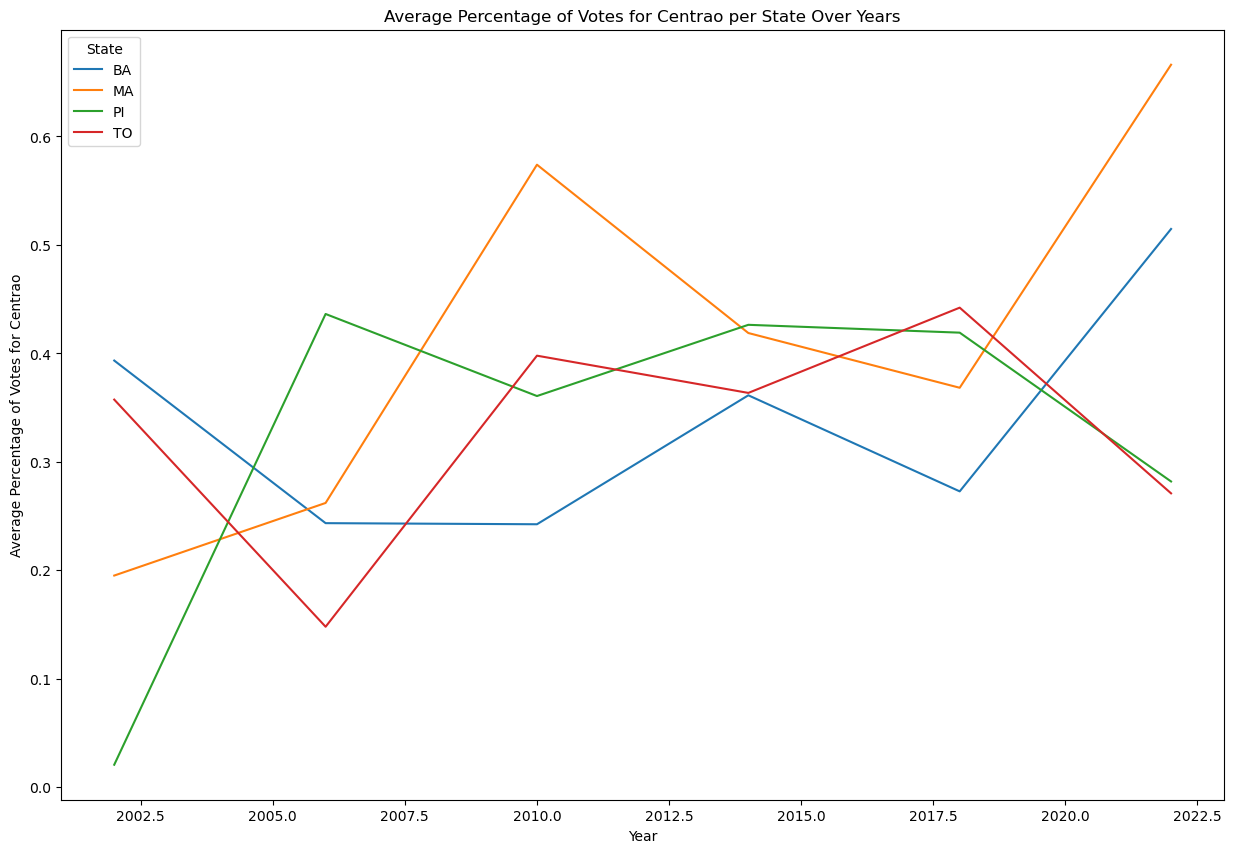

In [20]:
average_votes_centrao_per_state = regress_panel_matopiba.groupby(['uf','Year'])['percentage_votos_centrao'].mean()
average_votes_centrao_per_state.unstack(level=0).plot(kind='line', figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Average Percentage of Votes for Centrao')
plt.title('Average Percentage of Votes for Centrao per State Over Years')
plt.legend(title='State')
plt.show()

In [26]:
regress_panel_ba

,percentage_votos_centrao,ibge,municipio,pib_per_capita,uf,taxa_analfabetismo,Year,is_matopiba
1749,0.416144,2900108,ABAIRA,2474.23,BA,23.600000,2002,0
1750,0.082362,2900207,ABARE,1603.61,BA,31.900000,2002,0
1751,0.565845,2900306,ACAJUTIBA,2401.75,BA,30.600000,2002,0
1752,0.587786,2900355,ADUSTINA,4150.54,BA,43.800000,2002,0
1753,0.276025,2900405,AGUA FRIA,1397.45,BA,39.800000,2002,0
...,...,...,...,...,...,...,...,...
31701,0.047921,2933307,VITORIA DA CONQUISTA,20761.73,BA,10.366667,2018,0
31702,0.268324,2933406,WAGNER,7352.59,BA,17.953333,2018,0
31703,0.116934,2933455,WANDERLEY,10369.92,BA,19.400000,2018,0
31704,0.448010,2933505,WENCESLAU GUIMARAES,11503.29,BA,25.653333,2018,0


c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


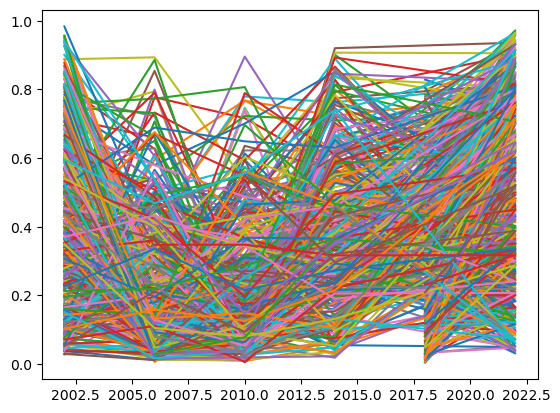

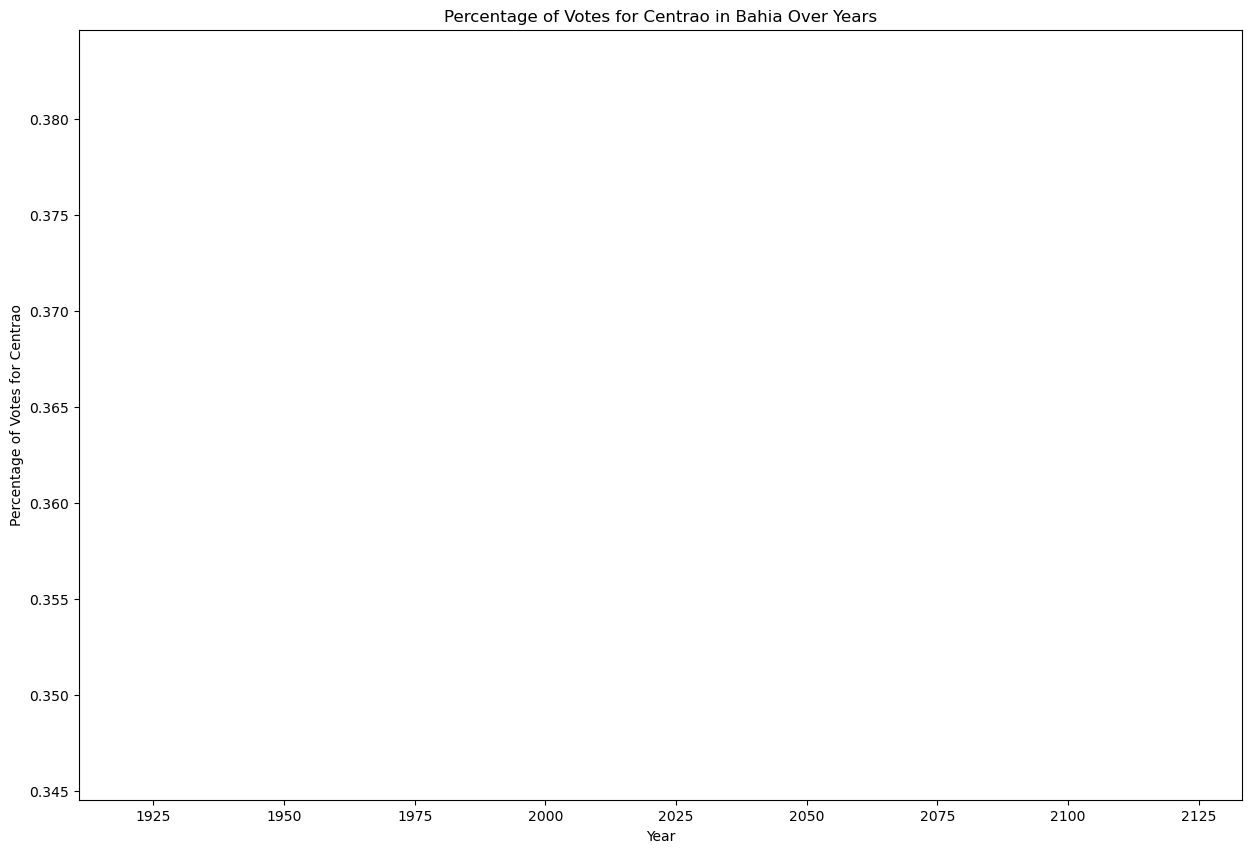

In [28]:
# Filter the data for Bahia
regress_panel_ba = regress_panel_matopiba[regress_panel_matopiba['uf'] == 'BA']

for i, city in enumerate(regress_panel_ba['municipio'].unique()):
    city_data = regress_panel_ba[regress_panel_ba['municipio'] == city]
    plt.plot(city_data['Year'], city_data['percentage_votos_centrao'], label=city)

# Plot the percentage of votes for Centrao in Bahia per year
plt.figure(figsize=(15, 10))
sns.lineplot(data=city_data, x='Year', y='percentage_votos_centrao')
plt.xlabel('Year')
plt.ylabel('Percentage of Votes for Centrao')
plt.title('Percentage of Votes for Centrao in Bahia Over Years')
plt.show()

In [22]:
pib_ba_combined['Atividade com maior valor adicionado bruto'].value_counts()

Atividade com maior valor adicionado bruto
Administração, defesa, educação e saúde públicas e seguridade social                    3735
Demais serviços                                                                          704
Agricultura, inclusive apoio à agricultura e a pós colheita                              205
Indústrias de transformação                                                              113
Indústrias extrativas                                                                     88
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação      65
Comércio e reparação de veículos automotores e motocicletas                               40
Pecuária, inclusive apoio à pecuária                                                      36
Produção florestal, pesca e aquicultura                                                   11
Construção                                                                                 7
Name: count, dtype: int64

In [23]:
pib_ba_combined['Agro'] = pib_ba_combined.apply(lambda x: 1 if x['Atividade com maior valor adicionado bruto'] in ['Agricultura, inclusive apoio à agricultura e a pós colheita', 'Pecuária, inclusive apoio à pecuária'] else 0, axis=1)

In [24]:
pib_ba_combined

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,is_matopiba,Year,GDP per Capita,Growth per Year,Agro
0,2002,2,Nordeste,29,BA,Bahia,2900108,Abaíra,NaN,2906,...,22651.563,2474.23,NaN,NaN,NaN,0,2002,2474.23,NaN,0
1,2002,2,Nordeste,29,BA,Bahia,2900207,Abaré,NaN,2902,...,22880.251,1603.61,NaN,NaN,NaN,0,2002,1603.61,NaN,0
2,2002,2,Nordeste,29,BA,Bahia,2900306,Acajutiba,NaN,2904,...,35363.417,2401.75,NaN,NaN,NaN,0,2002,2401.75,NaN,0
3,2002,2,Nordeste,29,BA,Bahia,2900355,Adustina,NaN,2904,...,60050.075,4150.54,NaN,NaN,NaN,0,2002,4150.54,NaN,0
4,2002,2,Nordeste,29,BA,Bahia,2900405,Água Fria,NaN,2903,...,20794.104,1397.45,NaN,NaN,NaN,0,2002,1397.45,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,2021,2,Nordeste,29,BA,Bahia,2933307,Vitória da Conquista,NaN,2906,...,8215792.966,23907.93,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",0,2021,23907.93,0.143412,0
8336,2021,2,Nordeste,29,BA,Bahia,2933406,Wagner,NaN,2906,...,89605.987,9591.73,"Administração, defesa, educação e saúde públic...",Demais serviços,"Agricultura, inclusive apoio à agricultura e a...",0,2021,9591.73,0.116504,0
8337,2021,2,Nordeste,29,BA,Bahia,2933455,Wanderley,NaN,2901,...,167757.286,13835.65,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,1,2021,13835.65,0.126130,0
8338,2021,2,Nordeste,29,BA,Bahia,2933505,Wenceslau Guimarães,NaN,2907,...,331642.160,15896.95,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços,0,2021,15896.95,0.134207,1


In [25]:
correlation = pib_ba_combined[['Agro', 'GDP per Capita']].corr().iloc[0, 1]
print(f"Correlation between Agro and Growth per Year: {correlation}")

Correlation between Agro and Growth per Year: 0.23002223095714527
